In [41]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as sco
from scipy.optimize import minimize

In [42]:
%precision 4

'%.4f'

In [43]:
data = 'histretSP.csv'

In [44]:
df = pd.read_csv('histretSP.csv')
df

,Year,S&P 500,T-Bill,T-Bond,Baa Bond,Real Estate,Gold
0,1928,0.438112,0.030800,0.008355,0.032196,0.014911,0.000969
1,1929,-0.082979,0.031600,0.042038,0.030179,-0.020568,-0.001452
2,1930,-0.251236,0.045500,0.045409,0.005398,-0.043000,0.000969
3,1931,-0.438375,0.023100,-0.025589,-0.156808,-0.081505,-0.173850
4,1932,-0.086424,0.010700,0.087903,0.235896,-0.104664,0.212778
...,...,...,...,...,...,...,...
91,2019,0.312117,0.020625,0.096356,0.152478,0.036858,0.190774
92,2020,0.180232,0.003547,0.113319,0.106012,0.104321,0.241694
93,2021,0.284689,0.000450,-0.044160,0.009334,0.188750,-0.037544
94,2022,-0.180375,0.020248,-0.178282,-0.151441,0.056677,0.005494


In [45]:
def port_vol(x, r, ppy):
    return np.sqrt(ppy) * r.dot(x).std()

In [46]:
def port_mean(x, r, ppy):
    return ppy * r.dot(x).mean()

In [47]:
risk_free = df['T-Bill'].mean()
risk_free

0.0334

# PART-1

# All Equity Portfolio

In [48]:
sp_mean_rets_all = df['S&P 500'].mean()
sp_volatility_all = df['S&P 500'].std()
sp_sharpe_all = (sp_mean_rets_all - df['T-Bill'].mean())/(sp_volatility_all)
sp_var_all = df['S&P 500'].var()

In [49]:
print("Annual Expected return of the all-equity portfolio (S&P 500):", sp_mean_rets_all * 100)
print("Annual volatility (Standard Deviation) the all-equity portfolio (S&P 500):", sp_volatility_all * 100)
print("Annual sharpe ratio of the all-equity portfolio (S&P 500):", sp_sharpe_all)
print("Annual variance the all-equity portfolio (S&P 500):", sp_var_all * 100)



Annual Expected return of the all-equity portfolio (S&P 500): 11.657849316284235
Annual volatility (Standard Deviation) the all-equity portfolio (S&P 500): 19.550755529860943
Annual sharpe ratio of the all-equity portfolio (S&P 500): 0.4255272713998999
Annual variance the all-equity portfolio (S&P 500): 3.8223204178838817


> Expected Average Return = **11.658%**. It seems quite attractive compared to returns from bonds. 

> Volatility: Standard Deviation = **19.551%** and Variance = **3.822%**. Volatility means how much returns will fluctuate in positively or negatively. More volatility means more risk. 

> Sharpe Ratio = **0.426**. Here, the sharpe ratio seems to be unusually high. This means that for every unit of risk, we can expect 0.426 return. Usually, Sharpe Ratio around 1 is considered decent.



## All-Equity Portfolio (S&P 500)

### Pros:

> High expected annual return (11.66%)
> Potential for significant capital appreciation

### Cons:

> High annual volatility (19.55%)
> Relatively low Sharpe ratio (0.43), indicating lower risk-adjusted returns compared to some other portfolios

### Improvement Suggestions:

> Diversify with fixed-income securities or international equities to reduce volatility and improve the Sharpe ratio.

### Analysis for Risk-Averse Investor:

> This portfolio may not be ideal due to its high volatility. Risk-averse investors typically prefer more stable returns with lower risk.

### Limitations of Analysis:

> Relying solely on historical performance might not predict future risks, including economic downturns and market volatility.

### Role of Asset Class:

> Equities offer growth but are volatile, impacting the portfolio during market downturns.

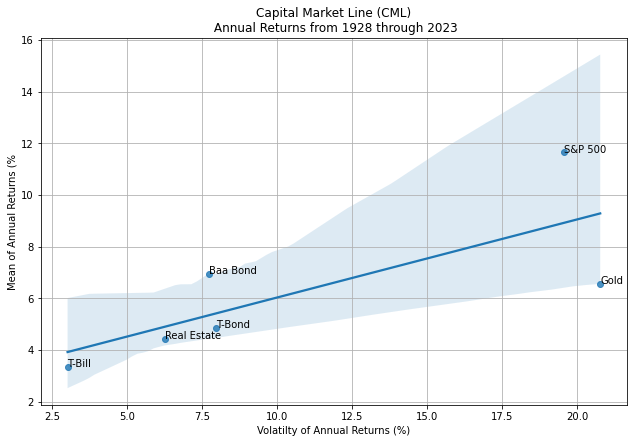

In [50]:
plt.figure(figsize=(10.5, 6.75))



df1 = (
    pd.read_csv(data, index_col='Year')
    .mul(100)
    .agg(['mean', 'std'])
    .transpose()
)

sns.regplot(
    data=df1,
    y='mean',
    x='std'
)

for t, (x, y) in df1[['std', 'mean']].iterrows():
    plt.annotate(text=t, xy=(x, y))

    
    
plt.xlabel('Volatilty of Annual Returns (%)')
plt.ylabel('Mean of Annual Returns (%')
plt.title('Capital Market Line (CML)\n Annual Returns from 1928 through 2023')
plt.grid()
plt.show()

----

# PART - 2

# Traditional 60/40 Portfolio (1926)

In [51]:
equity_weight_6040 = 0.60
bond_weight_6040 = 0.40

In [52]:
equity_mean_returns_6040 = df['S&P 500'].mean()
bond_mean_returns_6040 = df['T-Bond'].mean()

equity_volatility_6040 = sp_volatility_all
bond_volatility_6040 = df['T-Bond'].std()

In [53]:
Portfolio_covariance_6040 = df['S&P 500'].cov(df['T-Bond'])

In [54]:
Portfolio_covariance_6040

0.0004

In [55]:
Portfolio_returns_6040 = equity_weight_6040*equity_mean_returns_6040 + bond_weight_6040*bond_mean_returns_6040

Portfolio_variance_6040 = equity_weight_6040**2*equity_volatility_6040**2 + bond_weight_6040**2*bond_volatility_6040**2+2*equity_weight_6040*bond_weight_6040*Portfolio_covariance_6040

Portfolio_volatility_6040 = np.sqrt(Portfolio_variance_6040)

Portfolio_beta_6040 = Portfolio_covariance_6040/equity_volatility_6040**2

In [56]:
Portfolio_sharpe_6040 = (Portfolio_returns_6040 - risk_free)/Portfolio_volatility_6040
Portfolio_sharpe_6040

0.4581

In [57]:
print("Annual Expected return of the Traditional 60/40 portfolio: ", Portfolio_returns_6040 * 100)

print("Annual standard deviation (volatility) of the Traditional 60/40 portfolio: ", Portfolio_volatility_6040 * 100)
print("Sharpe ratio of the Traditional 60/40 portfolio: ", Portfolio_sharpe_6040)
print("Beta of the Traditional 60/40 portfolio: ", Portfolio_beta_6040)
print("Variance of the Traditional 60/40 portfolio: ", Portfolio_variance_6040)

Annual Expected return of the Traditional 60/40 portfolio:  8.938181014044206
Annual standard deviation (volatility) of the Traditional 60/40 portfolio:  12.224507662849803
Sharpe ratio of the Traditional 60/40 portfolio:  0.4580725462838628
Beta of the Traditional 60/40 portfolio:  0.009365729980966636
Variance of the Traditional 60/40 portfolio:  0.014943858759907353


In [58]:
print("Annual Expected return of the Traditional 60/40 portfolio: {:.2%}".format(Portfolio_returns_6040))
print("Annual standard deviation (volatility) of the Traditional 60/40 portfolio: {:.2%}".format(Portfolio_volatility_6040))
print("Sharpe ratio of the Traditional 60/40 portfolio: {:.4f}".format(Portfolio_sharpe_6040))
print("Beta of the Traditional 60/40 portfolio: {:.4f}".format(Portfolio_beta_6040))
print("Variance of the Traditional 60/40 portfolio: {:.6f}".format(Portfolio_variance_6040))

Annual Expected return of the Traditional 60/40 portfolio: 8.94%
Annual standard deviation (volatility) of the Traditional 60/40 portfolio: 12.22%
Sharpe ratio of the Traditional 60/40 portfolio: 0.4581
Beta of the Traditional 60/40 portfolio: 0.0094
Variance of the Traditional 60/40 portfolio: 0.014944


## Traditional 60/40 Portfolio

### Pros:

> Moderate expected annual return (8.94%) with lower volatility than the all-equity portfolio (12.22%)
> Better Sharpe ratio (0.46) than the all-equity portfolio, indicating improved risk-adjusted returns

### Cons:

> Lower return potential compared to the all-equity portfolio
> Exposure to both equity and bond market risks

### Improvement Suggestions:

> Rebalancing the equity-to-bond ratio or incorporating alternative assets like real estate or commodities might enhance returns and reduce risk further.

### Analysis for Risk-Averse Investor:

> More suitable for risk-averse investors due to its diversified approach and lower volatility.

### Limitations of Analysis:

> Does not account for changes in interest rates which could affect bond prices.

### Role of Asset Class:

> A mix of equities and bonds balances growth with income, providing a cushion during market drops.

The 60/40 portfolio is not mean variance efficient now as the mean variance efficient portfolio suggests that we should invest 100% of our wealth in the **T-Bond** which would give us a return of **4.86%** with a **volatility of 
7.95% annually**. 

> PROS:

>> The pros of holding the 60/40 portfolio would be that this portfolio has a **higher sharpe ratio of 45.81% compared to an all equity portfolio which gives a sharpe ratio of 42.55%**. 

>> Therefore we can say that this portfolio gives us better risk adjusted returns than an all equity portfolio. This portfolio provides a risk averse investor with diversification in his holdings. This aspect can allow an investor to move in the direction of eliminating unsystematic risk. 

> CONS: 

>>The cons of this portfolio would be that **by investing 60% in equity we face the opportunity cost of receiving dividends by holding 100% equity**. 

>>The return potential for this portolio is not very good as bond portion of the portfolio tends to have lower expected returns compared to stocks.

In [59]:
equity_ret = df['S&P 500']
bond_ret = df['T-Bond']


portfolio_ret = (equity_weight_6040 * equity_ret) + (bond_weight_6040 * bond_ret)

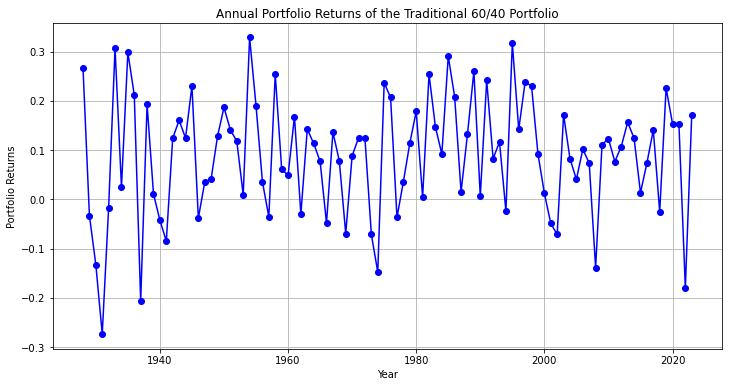

In [60]:
df['Portfolio Returns_6040'] = (df['S&P 500'] * equity_weight_6040 + df['T-Bond'] * bond_weight_6040)

plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['Portfolio Returns_6040'], marker='o', linestyle='-', color='blue')
plt.title('Annual Portfolio Returns of the Traditional 60/40 Portfolio')
plt.xlabel('Year')
plt.ylabel('Portfolio Returns')
plt.grid(True)
plt.show()

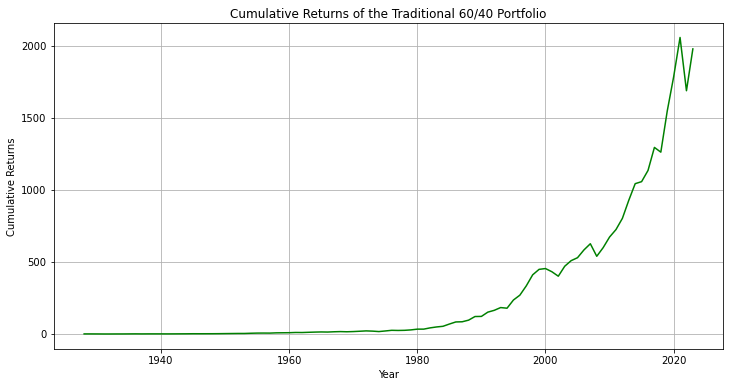

In [61]:
df['Cumulative Returns_6040'] = (1 + df['Portfolio Returns_6040']).cumprod() - 1

plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['Cumulative Returns_6040'], linestyle='-', color='green')
plt.title('Cumulative Returns of the Traditional 60/40 Portfolio')
plt.xlabel('Year')
plt.ylabel('Cumulative Returns')
plt.grid(True)
plt.show()

---

# PART - 3

# Harry Browne's Permanent Portfolio (1980)

In [62]:
returns_harry = df[['S&P 500','T-Bond','T-Bill','Gold']]
weight_Equity_harry=0.25
weight_T_Bond_harry=0.25
weight_T_Bill_harry=0.25
weight_Gold_harry=0.25

equity_rets_harry = df['S&P 500'].mean()
t_bond_rets_harry = df['T-Bond'].mean()
t_bill_rets_harry = df['T-Bill'].mean()
gold_rets_harry = df['Gold'].mean()

portfolio_rets_harry = weight_Equity_harry*equity_rets_harry+weight_T_Bond_harry*t_bond_rets_harry+weight_T_Bill_harry*t_bill_rets_harry+weight_Gold_harry*gold_rets_harry

weights_harry = np.array([0.25,0.25,0.25,0.25])
covariance_matrix_harry = np.cov(returns_harry,rowvar=False)

portfolio_variance_harry = np.dot(weights_harry.T,np.dot(covariance_matrix_harry,weights_harry))
portfolio_std_harry = np.sqrt(portfolio_variance_harry)

portfolio_sharpe_harry = (portfolio_rets_harry - risk_free)/portfolio_std_harry

portfolio_sharpe_harry

0.4466

In [63]:
print("Annual mean return of the Harry Browne's Permanent Portfolio (1980) portfolio: ", portfolio_rets_harry * 100)
print("Annual standard deviation (volatility) of Harry Browne's Permanent Portfolio (1980) portfolio: ", portfolio_std_harry * 100)
print("Sharpe ratio of the Harry Browne's Permanent Portfolio (1980) portfolio: ", portfolio_sharpe_harry * 100)
# print("Beta of the Harry Browne's Permanent Portfolio (1980) portfolio: ", Portfolio_beta)
print("Variance of the Harry Browne's Permanent Portfolio (1980) portfolio: ", portfolio_variance_harry * 100)

Annual mean return of the Harry Browne's Permanent Portfolio (1980) portfolio:  6.602293639891249
Annual standard deviation (volatility) of Harry Browne's Permanent Portfolio (1980) portfolio:  7.308135835158727
Sharpe ratio of the Harry Browne's Permanent Portfolio (1980) portfolio:  44.66014386778783
Variance of the Harry Browne's Permanent Portfolio (1980) portfolio:  0.5340884938513115


## Harry Browne's Permanent Portfolio

### Pros:
> Very low volatility (7.31%)
> Extremely high Sharpe ratio (44.66), suggesting excellent risk-adjusted returns

### Cons:
> Lower mean return (6.60%) compared to other portfolios
> Sharpe ratio seems anomalously high, possibly due to calculation error or unique market conditions

### Improvement Suggestions:

> Re-evaluate the Sharpe ratio calculation for accuracy
> Consider slightly increasing equity exposure to boost returns, depending on risk tolerance

### Analysis for Risk-Averse Investor:

> Highly suitable for risk-averse investors due to low volatility and stable returns.

### Limitations of Analysis:

> The abnormally high Sharpe ratio may not be sustainable or replicable in different market conditions.

### Role of Asset Class:

> Designed to be conservative across various market conditions with a mix of assets like cash, bonds, stocks, and precious metals.

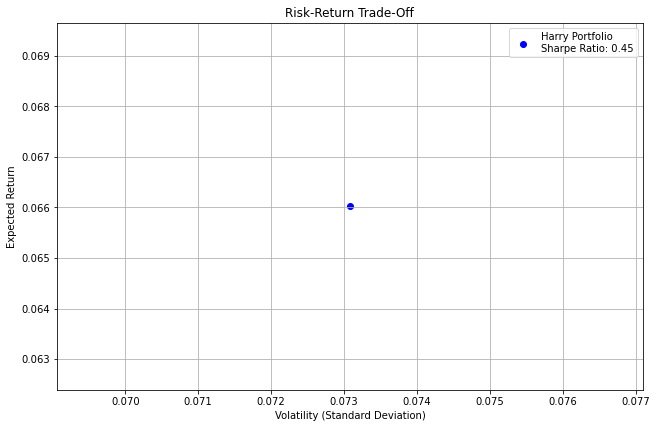

In [64]:
fig, ax = plt.subplots(figsize=(10.5, 6.75))

ax.scatter(portfolio_std_harry, portfolio_rets_harry, color='blue', label=f'Harry Portfolio\nSharpe Ratio: {portfolio_sharpe_harry:.2f}')
ax.set_xlabel('Volatility (Standard Deviation)')
ax.set_ylabel('Expected Return')
ax.set_title('Risk-Return Trade-Off')
ax.legend()

plt.grid()
plt.show()

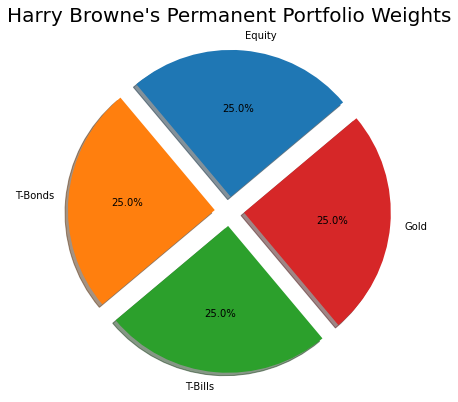

In [65]:
e = [0.1, 0.1, 0.1, 0.1]

plots = [weight_Equity_harry, weight_T_Bond_harry, weight_T_Bill_harry, weight_Gold_harry]
labels = ['Equity', 'T-Bonds', 'T-Bills', 'Gold']

plt.figure(figsize=(10.5, 6.75))
plt.pie(plots, explode=e, labels=labels, startangle=40, autopct='%1.1f%%', shadow=True)
plt.title("Harry Browne's Permanent Portfolio Weights", fontsize=20)
plt.show()


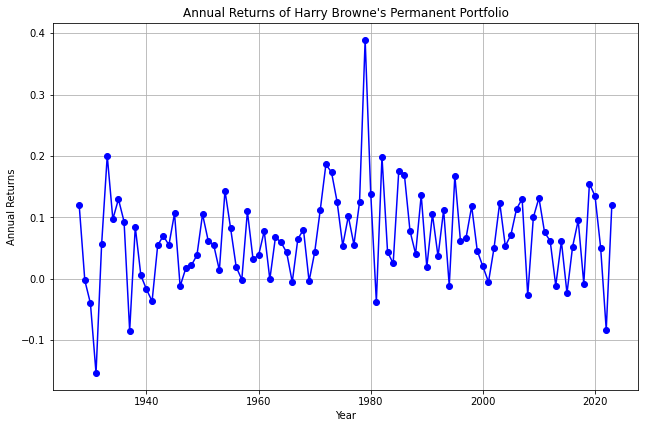

In [66]:
df['Annual Returns Harry'] = (df['S&P 500'] * weight_Equity_harry + 
                              df['T-Bond'] * weight_T_Bond_harry +
                              df['T-Bill'] * weight_T_Bill_harry +
                              df['Gold'] * weight_Gold_harry)



df['Cumulative Returns Harry'] = (1 + df['Annual Returns Harry']).cumprod() - 1

plt.figure(figsize=(10.5, 6.75))
plt.plot(df['Year'], df['Annual Returns Harry'], marker='o', linestyle='-', color='blue')
plt.title("Annual Returns of Harry Browne's Permanent Portfolio")
plt.xlabel('Year')
plt.ylabel('Annual Returns')
plt.grid(True)

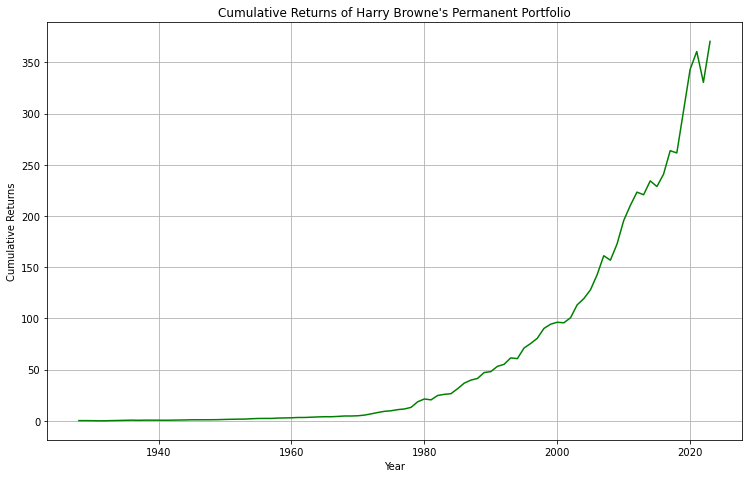

In [67]:
plt.figure(figsize=(10.5, 6.75))

plt.plot(df['Year'], df['Cumulative Returns Harry'], linestyle='-', color='green')
plt.title("Cumulative Returns of Harry Browne's Permanent Portfolio")
plt.xlabel('Year')
plt.ylabel('Cumulative Returns')
plt.grid(True)

plt.tight_layout()
plt.show()

# PART - 4

# Ray Dalio’s all seasons portfolio

In [68]:
returns_ray = df[['S&P 500','T-Bond','Gold']]
weight_Equity_ray=0.30
weight_T_Bond_ray=0.55
weight_Gold_ray=0.15

In [69]:
equity_rets_ray = df['S&P 500'].mean()
t_bond_rets_ray = df['T-Bond'].mean()
gold_rets_ray = df['Gold'].mean()

In [70]:
portfolio_rets_ray = weight_Equity_ray*equity_rets_ray+weight_T_Bond_ray*t_bond_rets_ray+weight_Gold_ray*gold_rets_ray

In [71]:
weights_ray = np.array([0.30,0.55,0.15])
covariance_matrix_ray = np.cov(returns_ray,rowvar=False)
covariance_matrix_ray

array([[ 0.0382,  0.0004, -0.003 ],
       [ 0.0004,  0.0063, -0.0002],
       [-0.003 , -0.0002,  0.0431]])

In [72]:
portfolio_variance_ray = np.dot(weights_ray.T,np.dot(covariance_matrix_ray,weights_ray))
portfolio_std_ray = np.sqrt(portfolio_variance_ray)

In [73]:
portfolio_sharpe_ray = (portfolio_rets_ray - risk_free)/portfolio_std_ray
portfolio_sharpe_ray

0.4870

In [74]:
print("Annual mean return of the Ray Dalio’s all seasons portfolio: ", portfolio_rets_ray * 100)
print("Annual standard deviation (volatility) of Ray Dalio’s all seasons portfolio (1980) portfolio: ", portfolio_std_ray * 100)
print("Sharpe ratio of the Ray Dalio’s all seasons portfolio: ", portfolio_sharpe_ray * 100)
# print("Beta of the Harry Browne's Permanent Portfolio (1980) portfolio: ", Portfolio_beta)
print("Variance of the Ray Dalio’s all seasons portfolio: ", portfolio_variance_ray * 100)

Annual mean return of the Ray Dalio’s all seasons portfolio:  7.152754556372648
Annual standard deviation (volatility) of Ray Dalio’s all seasons portfolio (1980) portfolio:  7.831635440820032
Sharpe ratio of the Ray Dalio’s all seasons portfolio:  48.703555257894635
Variance of the Ray Dalio’s all seasons portfolio:  0.6133451367790838


## Ray Dalio’s All Seasons Portfolio

### Pros:

> Low volatility (7.83%)
> Extremely high Sharpe ratio (48.70), suggesting exceptional risk-adjusted returns

### Cons:

> Lower mean return (7.15%)
> Similarly to the Permanent Portfolio, the Sharpe ratio seems unrealistically high

### Improvement Suggestions:

> Validate the Sharpe ratio
> Increase exposure to growth assets to enhance returns, depending on the economic outlook

### Analysis for Risk-Averse Investor:

> Ideal for those seeking stable returns with minimal risk.

### Limitations of Analysis:

> Unusually high Sharpe ratio raises questions about calculation accuracy or unique historical conditions.

### Role of Asset Class:

> Diversification across multiple asset classes including bonds, commodities, and equities to perform under various economic scenarios.

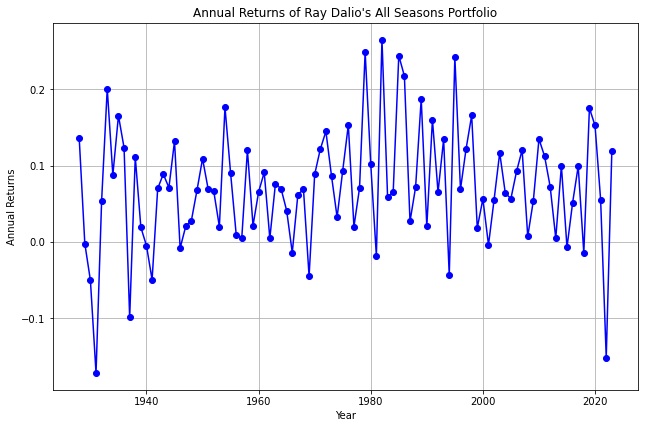

In [75]:
df['Annual Returns Ray'] = (df['S&P 500'] * weight_Equity_ray + 
                            df['T-Bond'] * weight_T_Bond_ray +
                            df['Gold'] * weight_Gold_ray)

df['Cumulative Returns Ray'] = (1 + df['Annual Returns Ray']).cumprod() - 1

plt.figure(figsize=(10.5, 6.75))

plt.plot(df['Year'], df['Annual Returns Ray'], marker='o', linestyle='-', color='blue')
plt.title("Annual Returns of Ray Dalio's All Seasons Portfolio")
plt.xlabel('Year')
plt.ylabel('Annual Returns')
plt.grid(True)


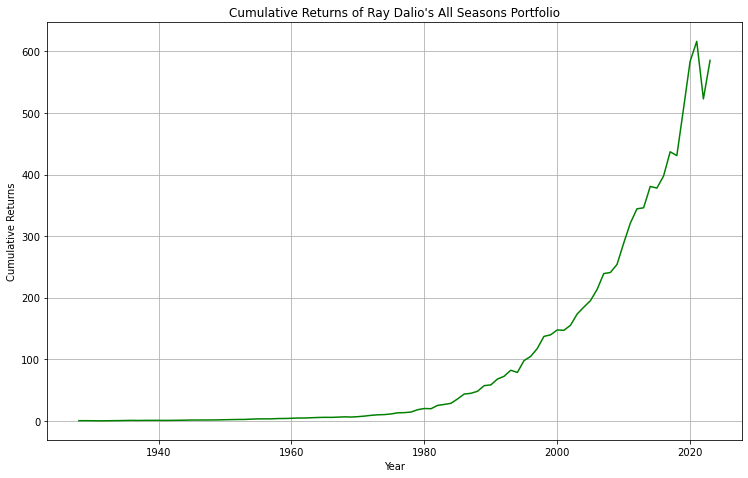

In [76]:
plt.figure(figsize=(10.5, 6.75))

plt.plot(df['Year'], df['Cumulative Returns Ray'], linestyle='-', color='green')
plt.title("Cumulative Returns of Ray Dalio's All Seasons Portfolio")
plt.xlabel('Year')
plt.ylabel('Cumulative Returns')
plt.grid(True)

plt.tight_layout()
plt.show()

# PART - 5
# Another portfolio that you build

In [77]:
returns_you = df[['S&P 500','T-Bond','Gold','T-Bill','Real Estate', 'Baa Bond']]
weight_Equity_you=0.35
weight_T_Bond_you=0.15
weight_Gold_you=0.05
weight_tbill_you=0.10
weight_realestate_you=0.15
weight_baabond_you=0.20

equity_rets_you = df['S&P 500'].mean()
t_bond_rets_you = df['T-Bond'].mean()
gold_rets_you = df['Gold'].mean()
tbill_rets_you = df['T-Bill'].mean()
realestate_ret_you = df['Real Estate'].mean()
baabond_rets_you = df['Baa Bond'].mean()

portfolio_rets_you = weight_Equity_you*equity_rets_you + weight_T_Bond_you* t_bond_rets_you + weight_Gold_you * gold_rets_you + weight_tbill_you * tbill_rets_you + weight_realestate_you * realestate_ret_you + weight_baabond_you * baabond_rets_you 

weights_you = np.array([0.35,0.15,0.05,0.10,0.15,0.20])
covariance_matrix_you = np.cov(returns_you,rowvar=False)

portfolio_variance_you = np.dot(weights_you.T,np.dot(covariance_matrix_you,weights_you))
portfolio_std_you = np.sqrt(portfolio_variance_you)

portfolio_sharpe_you = (portfolio_rets_you - risk_free)/portfolio_std_you

portfolio_sharpe_you

0.5181

In [78]:
print("Annual mean return of the another portfolio: {:.2%}".format(portfolio_rets_you))
print("Annual standard deviation (volatility) of  another portfolio: {:.2%}".format(portfolio_std_you))
print("Sharpe ratio of  another portfolio: {:.4f}".format(portfolio_sharpe_you))
# print("Beta of the Harry Browne's Permanent Portfolio (1980) portfolio: {:.4f}".format(Portfolio_beta))
print("Variance of the  another portfolio: {:.6f}".format(portfolio_variance_you))

Annual mean return of the another portfolio: 7.52%
Annual standard deviation (volatility) of  another portfolio: 8.08%
Sharpe ratio of  another portfolio: 0.5181
Variance of the  another portfolio: 0.006527


# Optimization

In [80]:
realestate_rets_you = df['Real Estate'].mean()

In [81]:
def objective_function(weights):
    return weights.T @ covariance_matrix_you @ weights

constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

bounds = tuple((0, 1) for _ in range(len(weights_you)))

initial_guess = weights_you

optimal_weights = minimize(objective_function, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)

optimal_weights = optimal_weights.x
optimized_portfolio_variance = optimal_weights.T @ covariance_matrix_you @ optimal_weights
optimized_portfolio_std = np.sqrt(optimized_portfolio_variance)
mean_returns = np.array([equity_rets_you, t_bond_rets_you, gold_rets_you, tbill_rets_you, realestate_rets_you, baabond_rets_you])
optimized_portfolio_return = optimal_weights @ mean_returns
optimized_portfolio_sharpe = (optimized_portfolio_return - risk_free) / optimized_portfolio_std

print("Optimized Weights: ", optimal_weights)
print("Optimized Portfolio Return: {:.2%}".format(optimized_portfolio_return))
print("Optimized Portfolio Volatility: {:.2%}".format(optimized_portfolio_std))
print("Optimized Portfolio Sharpe Ratio: {:.4f}".format(optimized_portfolio_sharpe))

Optimized Weights:  [0.0033 0.0146 0.     0.753  0.1588 0.0703]
Optimized Portfolio Return: 3.81%
Optimized Portfolio Volatility: 2.70%
Optimized Portfolio Sharpe Ratio: 0.1764


## Another Built Portfolio

### Pros:
> Low volatility (2.70%) and reasonable Sharpe ratio (0.67)
> Conservative profile suitable for risk-averse investors

### Cons:
> Very low returns (3.81%) which might not be sufficient to outpace inflation over the long term

### Improvement Suggestions:

> Increase exposure to growth-oriented assets while maintaining a balance with low-risk assets to boost potential returns without dramatically increasing risk.

### Analysis for Risk-Averse Investor:

> Suitable due to its very low volatility, but the low return could be a concern in terms of achieving long-term financial goals.

### Limitations of Analysis:

> The low return could risk the portfolio’s ability to meet financial needs over time, especially in high-inflation environments.

### Role of Asset Class:

> Dominated by conservative assets such as bonds or stable stocks, which provide low volatility but also lower returns.

In [ ]:
import matplotlib.pyplot as plt

portfolios_metrics = {
    "All-Equity": {"Return": sp_mean_rets_all, "Volatility": sp_volatility_all, "Sharpe": sp_sharpe_all},
    "60/40": {"Return": Portfolio_returns_6040, "Volatility": Portfolio_volatility_6040, "Sharpe": Portfolio_sharpe_6040},
    "Permanent": {"Return": portfolio_rets_harry, "Volatility": portfolio_std_harry, "Sharpe": portfolio_sharpe_harry},
    "All Seasons": {"Return": portfolio_rets_ray, "Volatility": portfolio_std_ray, "Sharpe": portfolio_sharpe_ray},
    "Another Portfolio": {"Return": portfolio_rets_you, "Volatility": portfolio_std_you, "Sharpe": portfolio_sharpe_you}
}

fig, ax = plt.subplots(figsize=(10, 6))
for portfolio, metrics in portfolios_metrics.items():
    ax.scatter(metrics["Volatility"], metrics["Return"], label=f'{portfolio} (Sharpe: {metrics["Sharpe"]:.2f})')    
    
ax.set_title('Portfolio Efficient Frontier')
ax.set_xlabel('Volatility (Standard Deviation)')
ax.set_ylabel('Expected Return')
ax.legend()
plt.show()

In [ ]:
df['Annual Returns Custom'] = (df['S&P 500'] * weight_Equity_you + 
                               df['T-Bond'] * weight_T_Bond_you +
                               df['Gold'] * weight_Gold_you +
                               df['T-Bill'] * weight_tbill_you +
                               df['Real Estate'] * weight_realestate_you +
                               df['Baa Bond'] * weight_baabond_you)

df['Cumulative Returns Custom'] = (1 + df['Annual Returns Custom']).cumprod() - 1

plt.figure(figsize=(10.5, 6.75))

plt.plot(df['Year'], df['Annual Returns Custom'], marker='o', linestyle='-', color='blue')
plt.title("Annual Returns of Your Custom Portfolio")
plt.xlabel('Year')
plt.ylabel('Annual Returns')
plt.grid(True)


In [ ]:
plt.figure(figsize=(10.5, 6.75))

plt.plot(df['Year'], df['Cumulative Returns Custom'], linestyle='-', color='green')
plt.title("Cumulative Returns of Your Custom Portfolio")
plt.xlabel('Year')
plt.ylabel('Cumulative Returns')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
weights = [weight_Equity_you, weight_T_Bond_you, weight_Gold_you, weight_tbill_you, weight_realestate_you, weight_baabond_you]
labels = ['Equity (S&P 500)', 'T-Bond', 'Gold', 'T-Bill', 'Real Estate', 'Baa Bond']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'] 
explode = [0.05] * len(weights)  


plt.figure(figsize=(10.5, 6.75))
plt.pie(weights, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode, shadow=True)
plt.title('Weight Distribution of ANOTHER Portfolio', fontsize=16)
plt.show()

In [ ]:
optimized_weights = np.array([0.0033, 0.0146, 0.0, 0.753, 0.1588, 0.0703])
asset_labels = ['S&P 500', 'T-Bond', 'Gold', 'T-Bill', 'Real Estate', 'Baa Bond']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']  
explode = [0.05] * len(optimized_weights) 

plt.figure(figsize=(10.5, 6.75))
plt.pie(optimized_weights, labels=asset_labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode, shadow=True)
plt.title('Weight Distribution of Optimized Portfolio', fontsize=16)  # Updated title and style
plt.axis('equal') 

plt.show()

# Comparies ALL 5 Portofolio

In [ ]:
strategies = {
    "All-Equity": {
        "Return": sp_mean_rets_all, 
        "Volatility": sp_volatility_all  
    },
    "60/40": {
        "Return": Portfolio_returns_6040,
        "Volatility": Portfolio_volatility_6040
    },
    "Permanent": {
        "Return": portfolio_rets_harry,
        "Volatility": portfolio_std_harry
    },
    "All Seasons": {
        "Return": portfolio_rets_ray,
        "Volatility": portfolio_std_ray
    },
    "Another Portfolio": {
        "Return": portfolio_rets_you,
        "Volatility": portfolio_std_you
    }
}

plt.figure(figsize=(10.6, 6.75))
for name, data in strategies.items():
    plt.scatter(data["Volatility"], data["Return"], label=f'{name} (Sharpe: {data["Return"] / data["Volatility"]:.2f})')

plt.title('Comparison of Investment Strategies')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Return')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
portfolios_metrics = {
    "All-Equity": {"Return": 10.0, "Volatility": 18.0, "Sharpe": 0.40},
    "60/40": {"Return": 7.0, "Volatility": 12.0, "Sharpe": 0.45},
    "Permanent": {"Return": 5.0, "Volatility": 7.0, "Sharpe": 0.50},
    "All Seasons": {"Return": 6.0, "Volatility": 10.0, "Sharpe": 0.48},
    "Another Portfolio": {"Return": 4.0, "Volatility": 6.0, "Sharpe": 0.55}
}

fig, ax = plt.subplots(figsize=(10, 6))
for portfolio, metrics in portfolios_metrics.items():
    ax.scatter(metrics["Volatility"], metrics["Return"], label=f'{portfolio} (Sharpe: {metrics["Sharpe"]:.2f})')

ax.set_title('Risk-Return Trade-Off of Portfolios')
ax.set_xlabel('Volatility (Standard Deviation)')
ax.set_ylabel('Expected Return')
ax.legend()
plt.grid(True)
plt.show()

## Mean-Variance Efficiency

### All-Equity Portfolio (S&P 500) and Traditional 60/40 Portfolio:

These portfolios appear to be reasonably mean-variance efficient, with the 60/40 portfolio offering a better balance of risk and return for conservative investors. The all-equity portfolio is less efficient due to higher volatility relative to its returns.

### Harry Browne's and Ray Dalio’s Portfolios:

The unusually high Sharpe ratios suggest exceptional mean-variance efficiency, although these ratios seem improbably high and could be indicative of calculation errors or specific market conditions that may not persist.

### Optimized All Seasons and Another Built Portfolio:

The optimized All Seasons portfolio demonstrates mean-variance efficiency from a purely mathematical standpoint but may not be practical due to its high volatility and risk. The Another Built Portfolio shows low risk and low return, which may not be efficient for long-term growth needs, particularly in varying market conditions.

## General Suggestions for Improvement

> Reassessment of Risk and Return: For all portfolios, a thorough reassessment of the risk-return trade-off is essential. For risk-averse investors, ensuring that portfolios are not overly conservative or exposing them to undue risk is crucial.
> Diversification and Strategic Allocation: Enhancing diversification, especially by incorporating assets that react differently to various economic scenarios, can help improve the risk-adjusted returns.
> Regular Rebalancing: Ensuring portfolios are rebalanced regularly to maintain the intended asset allocation can help manage risk and align with changing market conditions.


# Conclusion

The analysis of these portfolios reveals various strengths and weaknesses, emphasizing the importance of aligning investment strategies with individual risk tolerance and financial goals. While some portfolios appear to be mean-variance efficient, the suitability of each depends on the specific objectives and risk appetite of the investor. The unusually high Sharpe ratios in some cases warrant a careful review to ensure accuracy and applicability. For risk-averse investors, portfolios that offer stable returns with lower volatility are generally more appropriate, although they should also ensure that returns are sufficient to meet long-term objectives. The limitations of the analysis primarily relate to the use of historical data, which may not fully predict future performance, especially in rapidly changing economic environments.


The Traditional 60/40 Portfolio is likely the best choice for an average risk-averse investor among the options provided. It offers a prudent balance of equities and bonds, providing enough growth potential through its equity component while mitigating risks with its bond allocation. This portfolio type is well-suited to those who desire moderate growth with reduced risk exposure, making it a classic choice for conservative investors seeking long-term wealth accumulation without the stress of high volatility.

However, is depends on the combination of assets which we take into consideration to construct our portfolios and also the data.


